# Importing the necessary Libraries

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
sns.set()

In [3]:
data=pd.read_csv('diabetes_predict.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


In [4]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,3.703500,121.182500,69.145500,20.935000,80.254000,32.193000,0.470930,33.090500,0.342000
std,3.306063,32.068636,19.188315,16.103243,111.180534,8.149901,0.323553,11.786423,0.474498
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,63.500000,0.000000,0.000000,27.375000,0.244000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,40.000000,32.300000,0.376000,29.000000,0.000000
75%,6.000000,141.000000,80.000000,32.000000,130.000000,36.800000,0.624000,40.000000,1.000000
max,17.000000,199.000000,122.000000,110.000000,744.000000,80.600000,2.420000,81.000000,1.000000


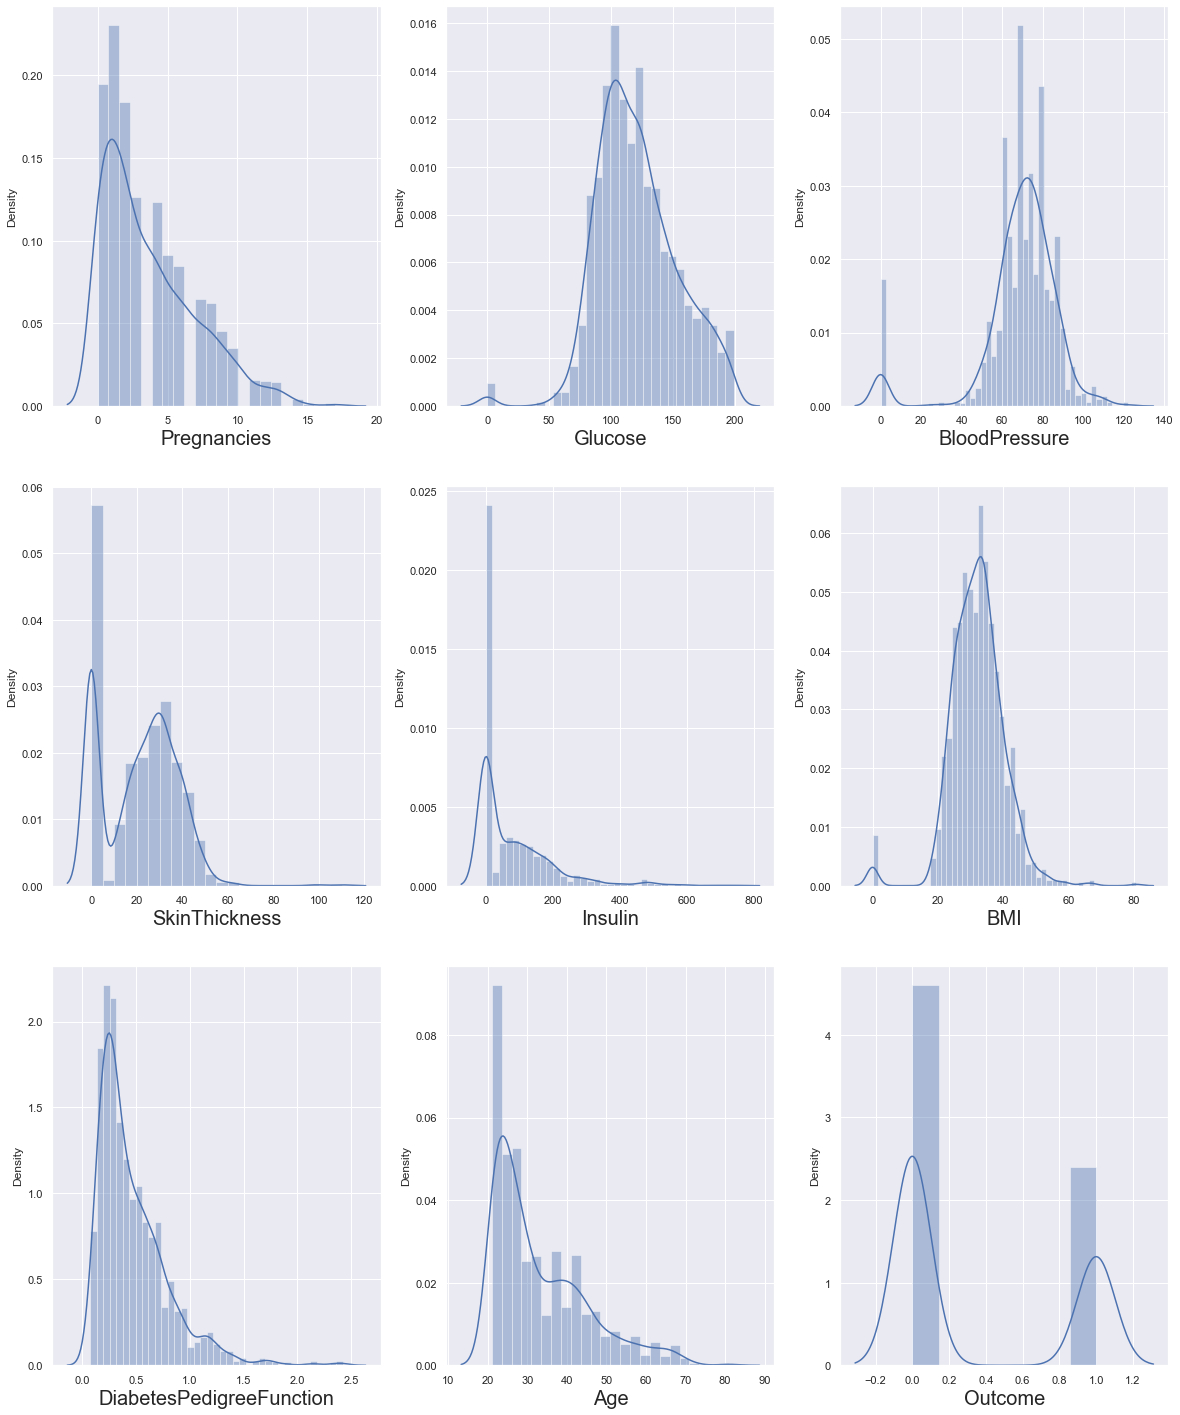

In [8]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber=1
for column in data:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

# Replace zero with mean value

In [9]:
data['BMI']=data['BMI'].replace(0,data['BMI'].mean())
data['BloodPressure']=data['BloodPressure'].replace(0,data['BloodPressure'].mean())
data['Glucose']=data['Glucose'].replace(0,data['Glucose'].mean())
data['Insulin']=data['Insulin'].replace(0,data['Insulin'].mean())
data['SkinThickness']=data['SkinThickness'].replace(0,data['SkinThickness'].mean())

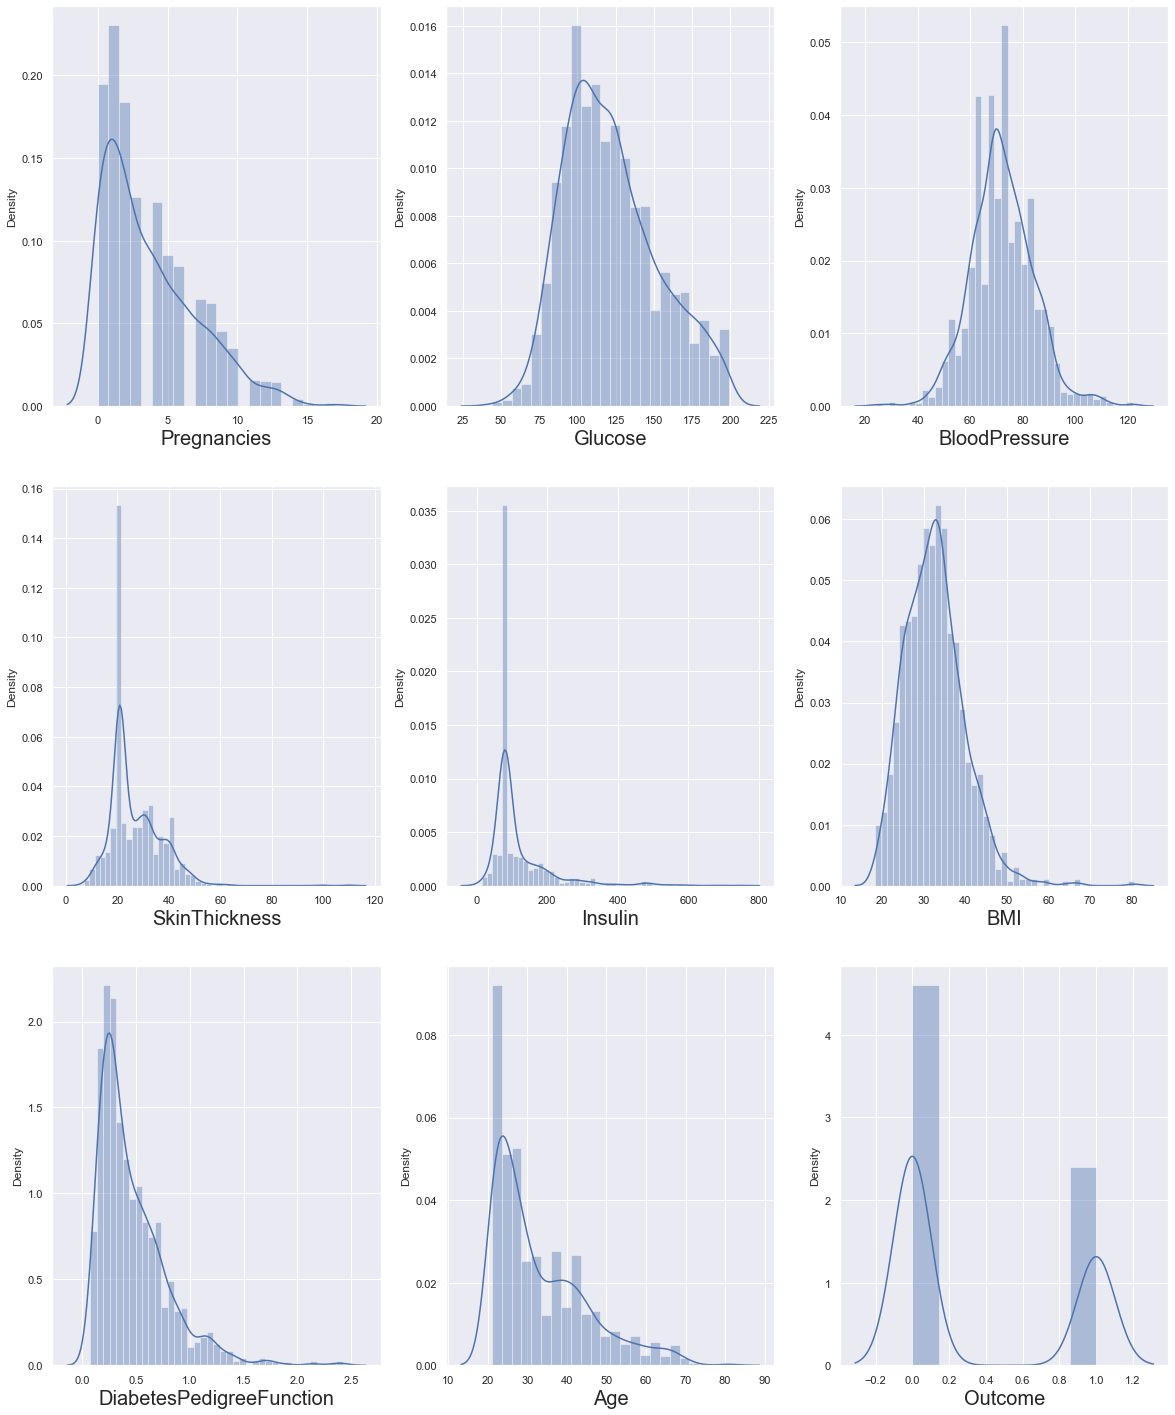

In [10]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber=1
for column in data:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

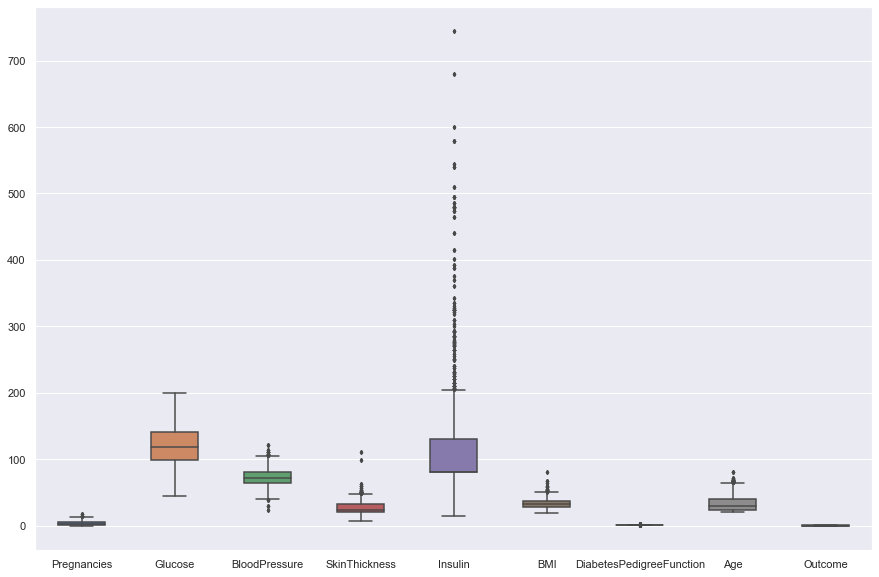

In [12]:
fig,ax=plt.subplots(figsize=(15,10))
sns.boxplot(data=data,width=0.5,ax=ax,fliersize=3)

In [14]:
q=data['Pregnancies'].quantile(0.98)
#removing top 2% from data
data_cleaned=data[data['Pregnancies']<q]

q=data_cleaned['BMI'].quantile(0.99)
# removing top 1% from data
data_cleaned=data[data['BMI']<q]

q=data_cleaned['SkinThickness'].quantile(0.99)
# removing top 1% from data
data_cleaned=data[data['SkinThickness']<q]

q=data_cleaned['Insulin'].quantile(0.99)
# removing top 1% from data
data_cleaned=data[data['Insulin']<q]

q=data_cleaned['DiabetesPedigreeFunction'].quantile(0.99)
# removing top 1% from data
data_cleaned=data[data['DiabetesPedigreeFunction']<q]

q=data_cleaned['Age'].quantile(0.99)
# removing top 1% from data
data_cleaned=data[data['Age']<q]

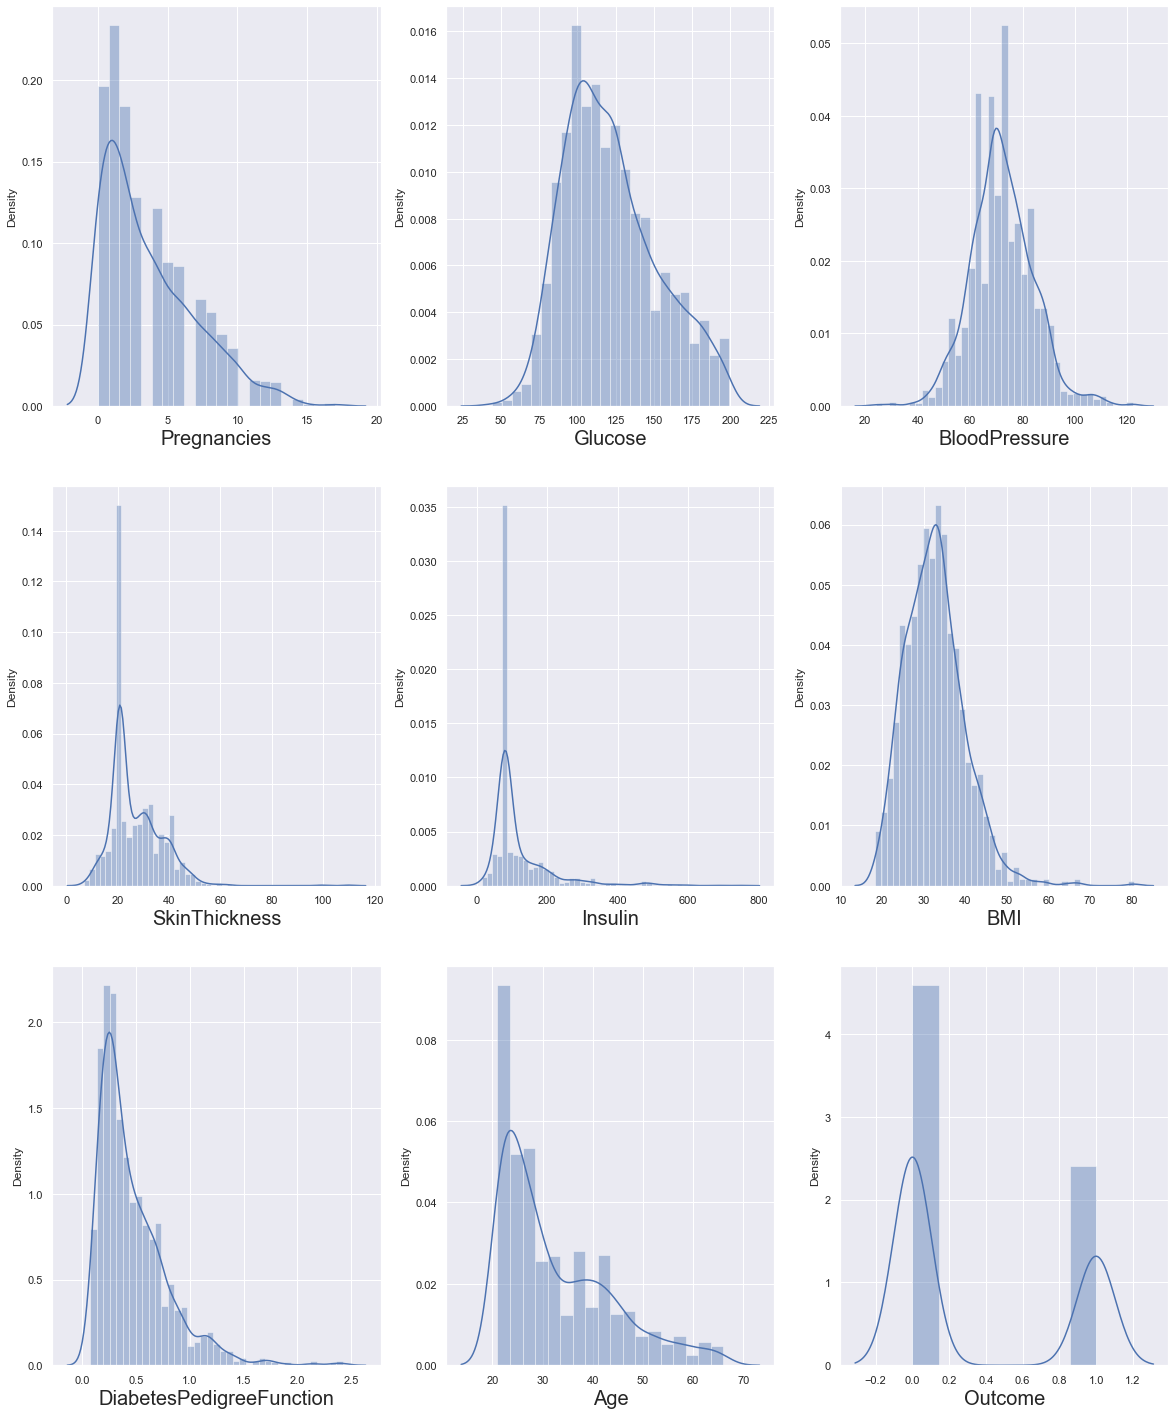

In [15]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber=1
for column in data_cleaned:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(data_cleaned[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

In [16]:
x=data.drop(columns=['Outcome'])
y=data['Outcome']

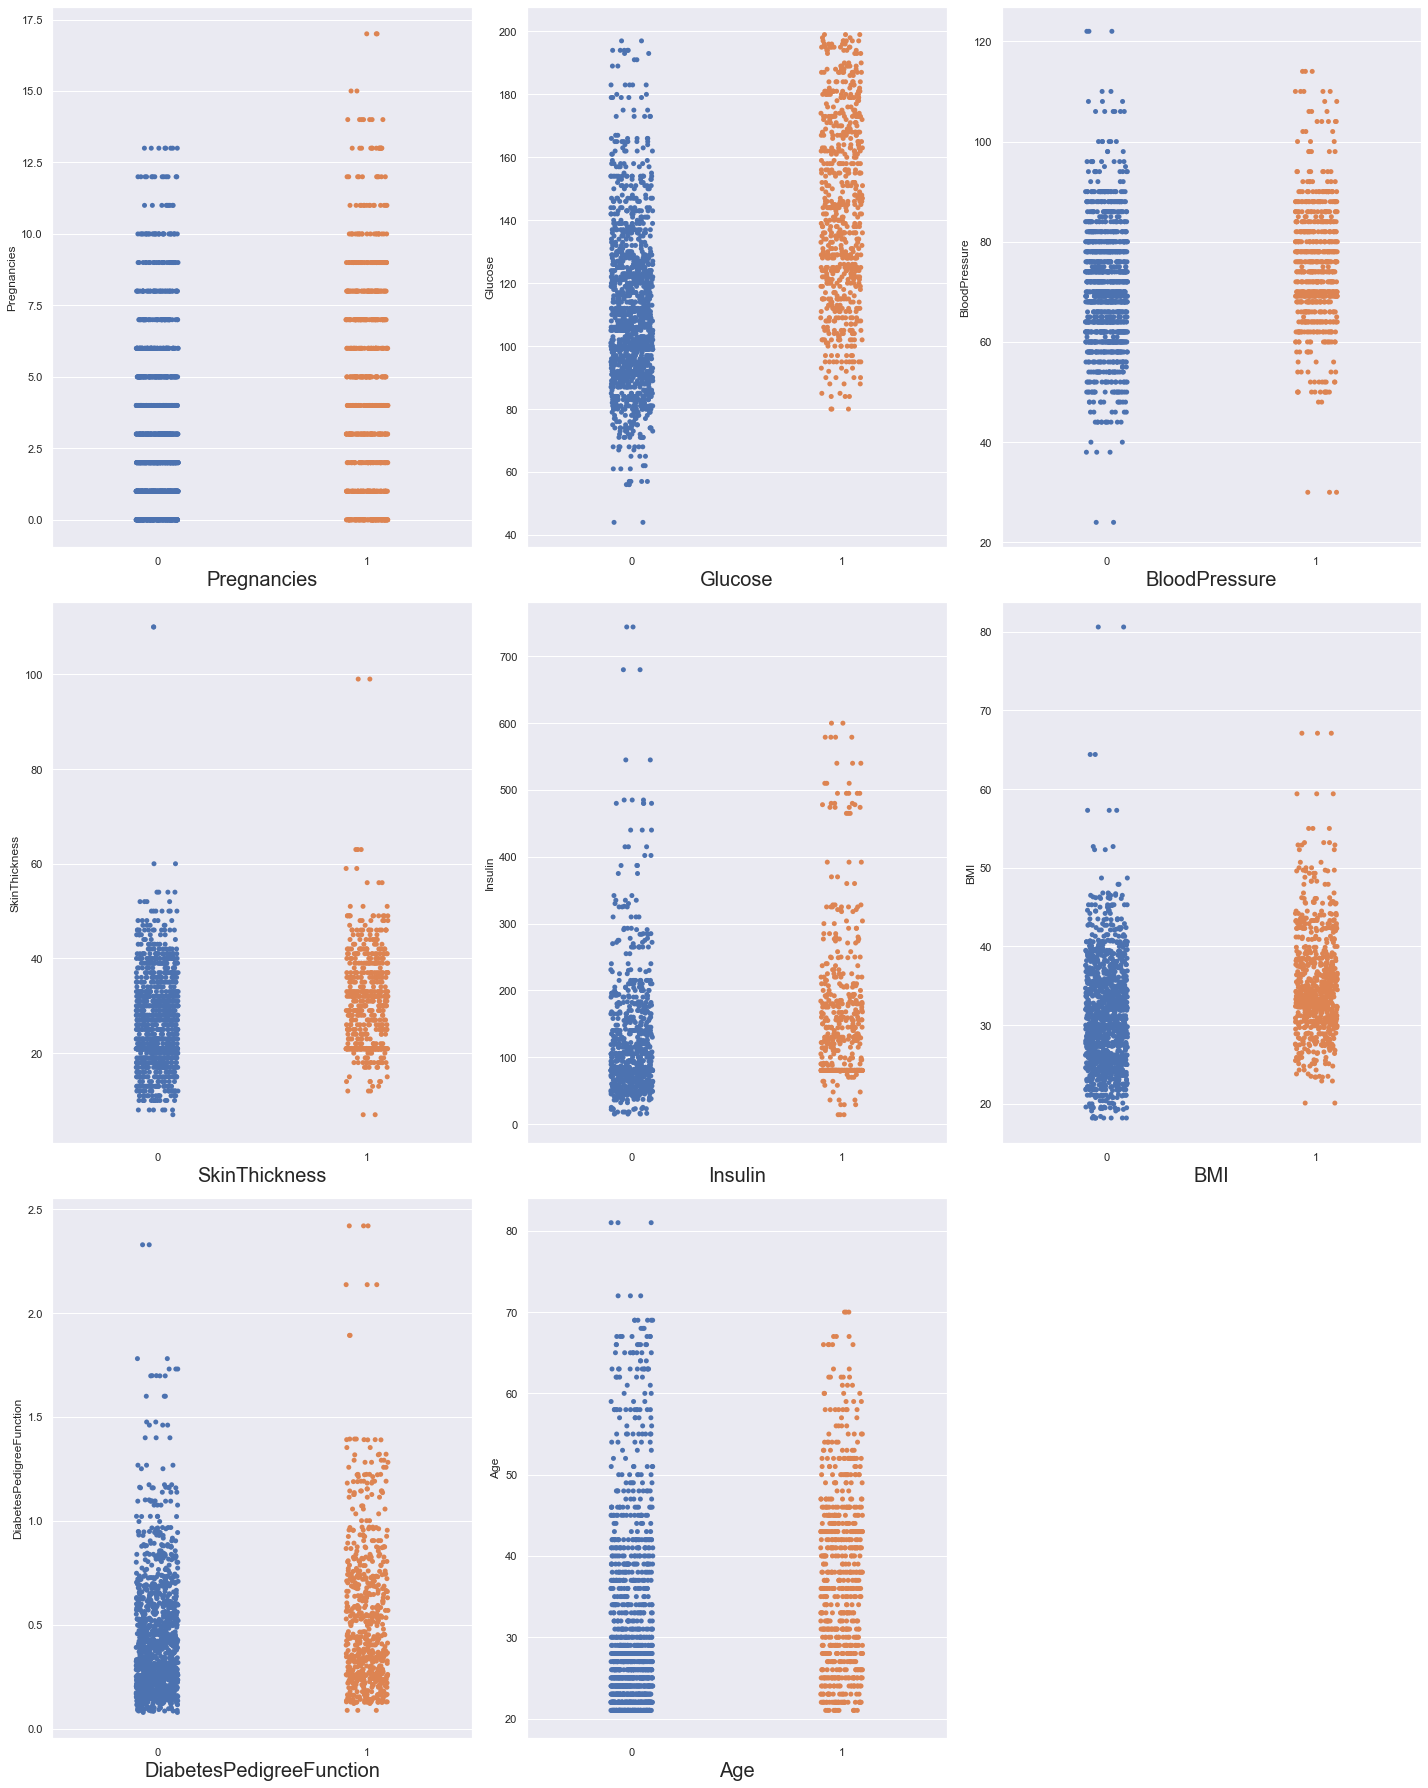

In [19]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber=1
for column in x:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.stripplot(y,x[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [20]:
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)

In [22]:
x_scaled

array([[-0.5153943 ,  0.52512783, -0.85720977, ...,  0.13303093,
        -1.06324616,  1.18042417],
       [-1.12049474, -1.2438823 ,  0.81424543, ...,  0.77293845,
        -0.7355513 , -0.85632626],
       [-1.12049474,  0.75444396, -0.26004061, ...,  1.60760043,
         0.49175869, -0.17740945],
       ...,
       [ 0.69480658, -1.21112285,  0.47995439, ..., -0.20083386,
        -0.27492362,  0.75610116],
       [-1.12049474,  0.23029281,  3.15428271, ...,  4.793227  ,
        -0.46968566, -0.60173245],
       [-0.5153943 , -1.34216064, -0.02148217, ..., -0.35385523,
         0.23516743, -0.68659705]])

In [23]:
vif=pd.DataFrame()
vif["VIF"]=[variance_inflation_factor(x_scaled,i) for i in range(x_scaled.shape[1])]
vif['Feature']=x.columns
vif

,VIF,Feature
0,1.416015,Pregnancies
1,1.328924,Glucose
2,1.220447,BloodPressure
3,1.421399,SkinThickness
4,1.267217,Insulin
5,1.490591,BMI
6,1.049461,DiabetesPedigreeFunction
7,1.603222,Age


# Training the model

In [24]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.25)

In [26]:
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [29]:
y_pred=knn.predict(x_test)

In [30]:
knn.score(x_train,y_train)

0.8966666666666666

In [31]:
print("The Accuracy score is:", accuracy_score(y_test,y_pred))

The Accuracy score is: 0.808


# Increase the accuracy using the hyperparameter tuning

In [32]:
param_grid={'algorithm':['ball_tree', 'kd_tree', 'brute'],
           'leaf_size':[18,20,25,27,30,32,34],
           'n_neighbors':[3,5,7,9,10,11,12,13]}

In [33]:
grid_search=GridSearchCV(knn,param_grid,verbose=3)

In [ ]:
grid_search.fit(x_train,y_train)

In [35]:
grid_search.best_params_

{'algorithm': 'ball_tree', 'leaf_size': 18, 'n_neighbors': 3}

In [36]:
knn=KNeighborsClassifier(algorithm='ball_tree', leaf_size=15, n_neighbors=5)

In [37]:
knn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='ball_tree', leaf_size=15, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [38]:
knn.score(x_train,y_train)

0.8966666666666666

In [39]:
knn.score(x_test,y_test)

0.808

# KFold Cross Validation

In [41]:
kfold=KFold(n_splits=12,random_state=42)
kfold.get_n_splits(x_scaled)

12

In [48]:
from statistics import mean
knn=KNeighborsClassifier(algorithm='ball_tree', leaf_size=18, n_neighbors=11)
cnt=0
count=[]
train_score=[]
test_score=[]
for train_index,test_index in kfold.split(x_scaled):
    x_train,x_test=x_scaled[train_index],x_scaled[test_index]
    y_train,y_test=y.iloc[train_index],y.iloc[test_index]
    knn.fit(x_train,y_train)
    train_score_=knn.score(x_train,y_train)
    test_score_=knn.score(x_test,y_test)
    cnt+=1
    count.append(cnt)
    train_score.append(train_score_)
    test_score.append(test_score_)
    print("For k is", cnt)
    print("Train score is", train_score, "Test Score is", test_score)
print("********************************************************")
print("********************************************************")
print("Average Train score is", mean(train_score))
print("Average Test score is", mean(test_score))

For k is 1
Train score is [0.8297872340425532] Test Score is [0.8263473053892215]
For k is 2
Train score is [0.8297872340425532, 0.8308783415166394] Test Score is [0.8263473053892215, 0.7065868263473054]
For k is 3
Train score is [0.8297872340425532, 0.8308783415166394, 0.8385160938352427] Test Score is [0.8263473053892215, 0.7065868263473054, 0.8263473053892215]
For k is 4
Train score is [0.8297872340425532, 0.8308783415166394, 0.8385160938352427, 0.8303327877795963] Test Score is [0.8263473053892215, 0.7065868263473054, 0.8263473053892215, 0.8143712574850299]
For k is 5
Train score is [0.8297872340425532, 0.8308783415166394, 0.8385160938352427, 0.8303327877795963, 0.839607201309329] Test Score is [0.8263473053892215, 0.7065868263473054, 0.8263473053892215, 0.8143712574850299, 0.8143712574850299]
For k is 6
Train score is [0.8297872340425532, 0.8308783415166394, 0.8385160938352427, 0.8303327877795963, 0.839607201309329, 0.839607201309329] Test Score is [0.8263473053892215, 0.706586826

# Plot the test accuracy with the value of k in k-fold

([<matplotlib.axis.YTick at 0x1bc8a06a588>,
 <a list of 7 Text yticklabel objects>)

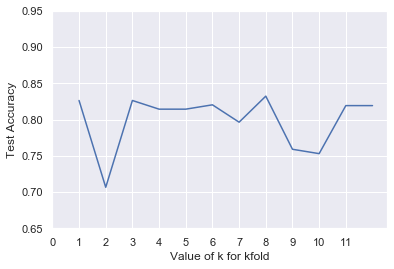

In [49]:
plt.plot(count,test_score)
plt.xlabel("Value of k for kfold")
plt.ylabel("Test Accuracy")
plt.xticks(np.arange(0,12,1))
plt.yticks(np.arange(0.65,1,0.05))